# Sports Data Analytics: Analysis of Penalties

From Matthias De Paolis & Tenzin Rungwatsang

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Factor:-Country" data-toc-modified-id="Factor:-Country-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Factor: Country</a></span></li><li><span><a href="#History" data-toc-modified-id="History-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>History</a></span></li><li><span><a href="#Tribune" data-toc-modified-id="Tribune-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tribune</a></span></li><li><span><a href="#Foot-Factor" data-toc-modified-id="Foot-Factor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Foot Factor</a></span></li><li><span><a href="#Scoring-Probability" data-toc-modified-id="Scoring-Probability-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scoring Probability</a></span></li><li><span><a href="#Elimination Phase" data-toc-modified-id="Elimination Phase-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Elimination Phase</a></span></li><li><span><a href="#Goal Zone" data-toc-modified-id="Goal Zone-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Goal Zone</a></span></li><li><span><a href="#Goalkeeper" data-toc-modified-id="Goalkeeper-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Goalkeeper</a></span></li></ul></div>


## Factor: Country
This section aims to examine whether there is a variation in the penalty shootout performances of different nations based on whether they are the host nation or guest nation.

In [ ]:
# load dataset
import pandas as pd
df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

The follwoing code shows the performance of host nations in penalty shootouts in the given dataset by calculating the number of goals, on-target shots, missed shots, and total events. 

In [ ]:
n_events_host = 0
n_goal_host = 0
n_onTarget_host = 0
n_missed_host = 0

for i in range(len(df)):
    if df.loc[i]['Team'] == df.loc[i]['Country_Code']:
        # count events
        n_events_host += 1

        # count goals
        if df.loc[i]['Goal'] == 1:
            n_goal_host += 1
        # count goalkeeper held
        elif df.loc[i]['OnTarget'] == 1:
            n_onTarget_host += 1
            
        # count number of missed target
        if df.loc[i]['OnTarget'] == 0:
            n_missed_host += 1

print("number of scores from host nation during PSO:", n_events_host)
print("number of goals a host nation scored in PSO:", n_goal_host)
print("number of times goalkeeper from guest nation held ball:", n_onTarget_host)
print("number of times player from host nation missed goal:", n_missed_host)

number of scores from host nation during PSO: 36
number of goals a host nation scored in PSO: 27
number of times goalkeeper from guest nation held ball: 7
number of times player from host nation missed goal: 2


The follwoing code shows the performance of guest nations in penalty shootouts in the given dataset by calculating the number of goals, on-target shots, missed shots, and total events.

In [ ]:
n_events_guest = 0
n_goal_guest = 0
n_onTarget_guest = 0
n_missed_guest = 0

for i in range(len(df)):
    if df.loc[i]['Team'] != df.loc[i]['Country_Code']:
        # count events
        n_events_guest += 1

        # count goals
        if df.loc[i]['Goal'] == 1:
            n_goal_guest += 1
        # count goalkeeper held
        elif df.loc[i]['OnTarget'] == 1:
            n_onTarget_guest += 1
            
        # count number of missed target
        if df.loc[i]['OnTarget'] == 0:
            n_missed_guest += 1

print("number of scores from guest nation during PSO:", n_events_guest)
print("number of goals a guest nation scored in PSO:", n_goal_guest)
print("number of times goalkeeper held ball:", n_onTarget_guest)
print("number of times player from missed goal:", n_missed_guest)

number of scores from guest nation during PSO: 284
number of goals a guest nation scored in PSO: 194
number of times goalkeeper held ball: 64
number of times player from missed goal: 26


This code generates a grouped bar chart using Seaborn to compare the performance of host and guest nations during penalty shootout.

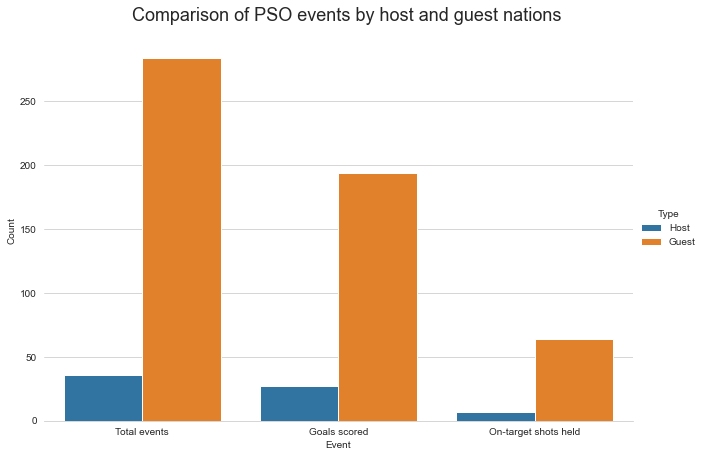

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {'Type': ['Host', 'Host', 'Host', 'Guest', 'Guest', 'Guest'],
        'Event': ['Total events', 'Goals scored', 'On-target shots held', 'Total events', 'Goals scored', 'On-target shots held'],
        'Count': [n_events_host, n_goal_host, n_onTarget_host, n_events_guest, n_goal_guest, n_onTarget_guest]}
df = pd.DataFrame(data)

# Set up the chart
sns.set_style("whitegrid")
g = sns.catplot(x="Event", y="Count", hue="Type", data=df, kind="bar", height=6, aspect=1.5)
g.despine(left=True)
g.set_ylabels("Count")
g.set_xlabels("Event")
g.fig.suptitle('Comparison of PSO events by host and guest nations', fontsize=18, y=1.05)

# Show the chart
plt.show()

## History

Which nation had the most PSO?

The code below shows the number of participations and wins of different football teams in penalty shootouts of the World Cup.

C:\Users\rungw\AppData\Local\Temp/ipykernel_28132/1925889658.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_counts_wins_filtered['Rank'] = team_counts_wins_filtered['Wins'].rank(method='min', ascending=False)


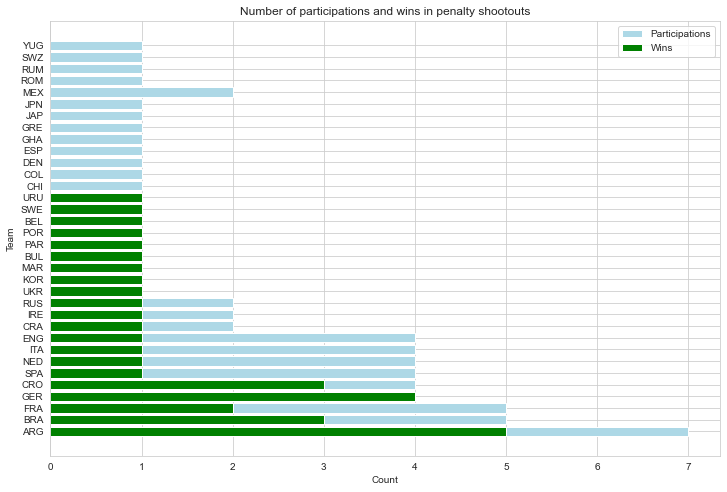

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data
df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

# count and rank the number of participations
team_counts_participations = df.groupby('Team')['Game_id'].nunique().reset_index(name='Participations')
team_counts_participations['Rank'] = team_counts_participations['Participations'].rank(ascending=False)

# count and rank the number of wins
df['Is_Winner'] = df['Team'] == df['Winner']
team_counts_wins = df.groupby('Team')['Is_Winner'].sum().reset_index(name='Wins')
team_counts_wins_filtered = team_counts_wins[team_counts_wins['Wins'] > 0]
team_counts_wins_filtered['Rank'] = team_counts_wins_filtered['Wins'].rank(method='min', ascending=False)

# merge the two dataframes
team_counts = team_counts_participations.merge(team_counts_wins_filtered, on='Team', how='left')
team_counts['Wins'] = team_counts['Wins'].fillna(0)
team_counts['Rank'] = team_counts['Rank_x'] + team_counts['Rank_y']
team_counts = team_counts.drop(['Rank_x', 'Rank_y'], axis=1)
team_counts = team_counts.sort_values(by='Rank')

# plot the results
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(team_counts['Team'], team_counts['Participations'], label='Participations', color='lightblue')
ax.barh(team_counts['Team'], team_counts['Wins'], label='Wins', color='green')
ax.set_xlabel('Count')
ax.set_ylabel('Team')
ax.set_title('Number of participations and wins in penalty shootouts')
ax.legend()
plt.show()


This code analyzes the performance of soccer teams in penalty shootouts in FIFA World Cup history. 

In [ ]:
import pandas as pd
import plotly.express as px

# read the data
df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

# count and rank the number of participations
team_counts_participations = df.groupby('Team')['Game_id'].nunique().reset_index(name='Participations')
team_counts_participations['Rank'] = team_counts_participations['Participations'].rank(ascending=False)

# count and rank the number of wins
df['Is_Winner'] = df['Team'] == df['Winner']
team_counts_wins = df.groupby('Team')['Is_Winner'].sum().reset_index(name='Wins')
team_counts_wins_filtered = team_counts_wins[team_counts_wins['Wins'] > 0]
team_counts_wins_filtered['Rank'] = team_counts_wins_filtered['Wins'].rank(method='min', ascending=False)

# merge the two dataframes
team_counts = team_counts_participations.merge(team_counts_wins_filtered, on='Team', how='left')
team_counts['Wins'] = team_counts['Wins'].fillna(0)
team_counts['Rank'] = team_counts['Rank_x'] + team_counts['Rank_y']
team_counts = team_counts.drop(['Rank_x', 'Rank_y'], axis=1)
team_counts = team_counts.sort_values(by='Rank')

# create a pie chart for the number of participations
fig1 = px.pie(team_counts, values='Participations', names='Team', title='Number of Participations in Penalty Shootouts')
fig1.show()

# create a pie chart for the number of wins
fig2 = px.pie(team_counts, values='Wins', names='Team', title='Number of Wins in Penalty Shootouts')
fig2.show()


ModuleNotFoundError: No module named 'plotly'

## Tribune

This code analyzes the number of goals scored and missed by each team in penalty shootouts when they are playing in front of their own fans. 

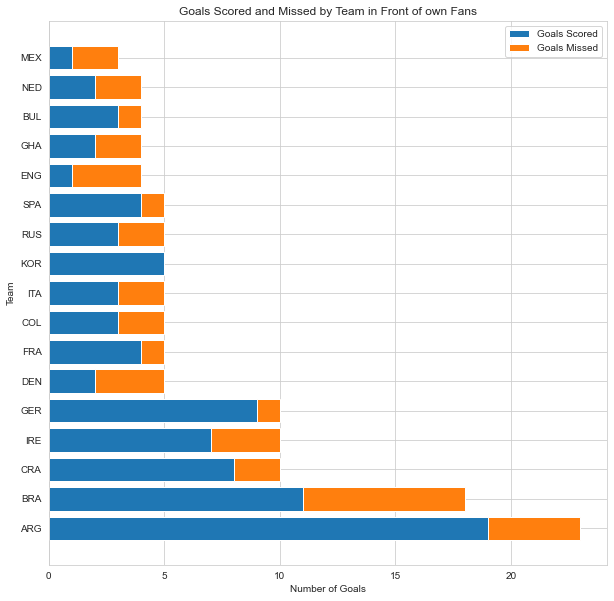

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

# Count goals scored if Fan_Tribune is equal to team
goal_count_scored = df.groupby("Team")["Goal"].apply(lambda x: (x[df["Fan_Tribune"] == x.name] != 0).sum()).reset_index(name="Goals Scored")

# Count goals missed if Fan_Tribune is equal to team
goal_count_missed = df.groupby("Team")["Goal"].apply(lambda x: (x[df["Fan_Tribune"] == x.name] != 1).sum()).reset_index(name="Goals Missed")

# Merge the two dataframes
merged_df = pd.merge(goal_count_scored, goal_count_missed, on="Team")

# Create a new column that is the sum of the "Goals Scored" and "Goals Missed" columns
merged_df["Total Goals"] = merged_df["Goals Scored"] + merged_df["Goals Missed"]

# Filter out teams with 0 goals scored and missed
merged_df = merged_df[(merged_df["Goals Scored"] > 0) | (merged_df["Goals Missed"] > 0)]

# Sort the dataframe by "Total Goals" in descending order
merged_df = merged_df.sort_values("Total Goals", ascending=False)

# Plot the results
plt.figure(figsize=(10,10))
plt.barh(merged_df["Team"], merged_df["Goals Scored"], label="Goals Scored")
plt.barh(merged_df["Team"], merged_df["Goals Missed"], left=merged_df["Goals Scored"], label="Goals Missed")
plt.xlabel("Number of Goals")
plt.ylabel("Team")
plt.title("Goals Scored and Missed by Team in Front of own Fans")
plt.legend()
plt.show()

This code analyzes the success rate for penalties scored in front of home fans for each team in a given dataset.

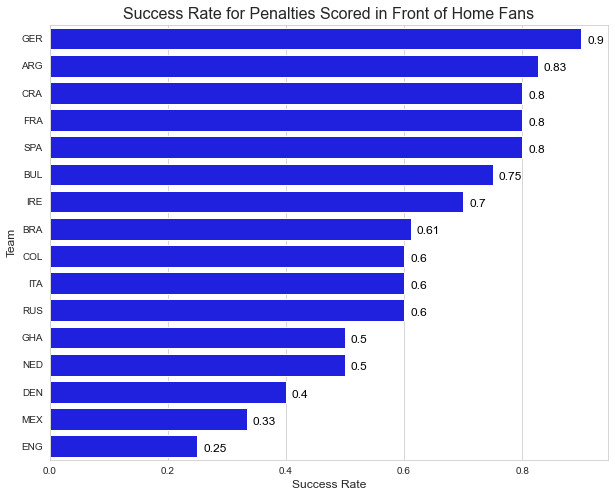

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

# Calculate the number of goals scored by each team when shooting in front of their own fans
goals_scored = df.groupby("Team")["Goal"].apply(lambda x: (x[df["Fan_Tribune"] == x.name] != 0).sum()).reset_index(name="Goals Scored")
goals_scored = goals_scored[goals_scored["Goals Scored"] != 0]

# Calculate the number of goals missed by each team when shooting in front of their own fans
goals_missed = df.groupby("Team")["Goal"].apply(lambda x: (x[df["Fan_Tribune"] == x.name] != 1).sum()).reset_index(name="Goals Missed")
goals_missed = goals_missed[goals_missed["Goals Missed"] != 0]

# Merge the two dataframes
df_goals = pd.merge(goals_scored, goals_missed, on="Team")

# Calculate the success rate for each team
df_goals["Success Rate"] = df_goals["Goals Scored"] / (df_goals["Goals Scored"] + df_goals["Goals Missed"])

# Sort the data by success rate
df_goals = df_goals.sort_values(by="Success Rate", ascending=False)

# Create the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="Success Rate", y="Team", data=df_goals, color="blue")

# Add labels and title
ax.set_xlabel("Success Rate", fontsize=12)
ax.set_ylabel("Team", fontsize=12)
ax.set_title("Success Rate for Penalties Scored in Front of Home Fans", fontsize=16)

# Add values to the bars
for i, v in enumerate(df_goals["Success Rate"]):
    ax.text(v + 0.01, i + 0.2, str(round(v, 2)), color="black", fontsize=12)

# Show the plot
plt.show()

## Foot Factor

This code analyzes the relationship between the foot used for a penalty shootout and the corresponding success rate.

In [ ]:
import pandas as pd

# read the data
df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

# filter out rows with missing foot information
df_foot = df.dropna(subset=['Foot'])

# calculate the total number of goals scored with each foot
goals_by_foot = df_foot.groupby('Foot')['Goal'].sum()

# calculate the total number of shots taken with each foot
shots_by_foot = df_foot.groupby('Foot')['Goal'].count()

# calculate the percentage of shots that resulted in goals for each foot
goal_percent_by_foot = goals_by_foot / shots_by_foot

# print the results
print("Total goals by foot:")
print(goals_by_foot)
print()

print("Total shots by foot:")
print(shots_by_foot)
print()

print("Goal percentage by foot:")
print(goal_percent_by_foot)

Total goals by foot:
Foot
L     44
R    177
Name: Goal, dtype: int64

Total shots by foot:
Foot
L     64
R    256
Name: Goal, dtype: int64

Goal percentage by foot:
Foot
L    0.687500
R    0.691406
Name: Goal, dtype: float64


This code analyzes the the relationship between which foot was used to kick the pnealty and the number of shots that missed the target.

In [ ]:
import pandas as pd

# read the data
df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

# group the data by the "Foot" column
foot_groups = df.groupby("Foot")

# calculate the number of shots, the number of shots that missed, and the percentage of shots that missed for each foot
foot_shots = foot_groups.size()
foot_misses = foot_shots - foot_groups["OnTarget"].sum()
foot_miss_percent = (foot_misses / foot_shots) * 100

# print the results
print("Right Foot:")
print(f"Shots: {foot_shots['R']}")
print(f"Misses: {foot_misses['R']}")
print(f"Miss Percentage: {foot_miss_percent['R']:.2f}%")

print("\nLeft Foot:")
print(f"Shots: {foot_shots['L']}")
print(f"Misses: {foot_misses['L']}")
print(f"Miss Percentage: {foot_miss_percent['L']:.2f}%")

Right Foot:
Shots: 256
Misses: 23
Miss Percentage: 8.98%

Left Foot:
Shots: 64
Misses: 5
Miss Percentage: 7.81%


The code below shows the proportion on goal scoring between players which kick the penalty with the right foot and player that kick the penalty with the left foot. The difference is marginal.

Goal   0    1  proportion
Foot                     
L     15   44    0.745763
R     56  177    0.759657


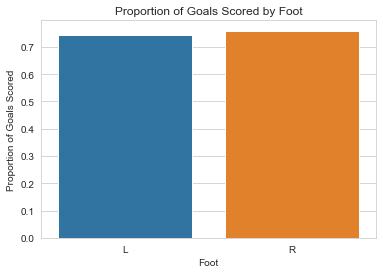

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the data
df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

# Subset the data to only include shots on target
shots_on_target = df[df['OnTarget'] == 1]

# Create a contingency table of foot and goals scored
foot_goals_table = pd.crosstab(index=shots_on_target['Foot'], columns=shots_on_target['Goal'])

# Calculate the proportion of goals scored for each foot
foot_goals_table['proportion'] = foot_goals_table[1] / (foot_goals_table[0] + foot_goals_table[1])

# Print the contingency table
print(foot_goals_table)

# Create a bar plot of the proportion of goals scored for each foot
sns.barplot(x=foot_goals_table.index, y=foot_goals_table['proportion'])
plt.title('Proportion of Goals Scored by Foot')
plt.xlabel('Foot')
plt.ylabel('Proportion of Goals Scored')
plt.show()

## Stage

The code illustrates the variation in scores across the different stages of the tournament, highlighting a noticeable contrast between them.

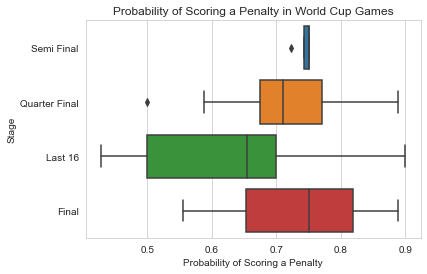

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("NEW_word_cup_penalty_dataset_extended.xlsx")

# Create a new column "Reward" that takes the value 1 if a goal was scored and 0 otherwise
df['Reward'] = df['Goal'].apply(lambda x: 1 if x==1 else 0)

# Group the dataframe by game and calculate the sum of rewards to get the total number of goals scored in each game
goals = df.groupby(['Year', 'Stage'])['Reward'].sum()

# Count the number of penalties taken in each game
penalties = df.groupby(['Year', 'Stage'])['Penalty_Number'].count()

# Calculate the probability of scoring a goal in each game
probabilities = goals/penalties

# Reset the index of the probabilities dataframe to make the Year and Stage columns into regular columns
probabilities = probabilities.reset_index()
probabilities.rename(columns = {0:'Probability'}, inplace = True)

# Create the boxplot
sns.boxplot(x=probabilities['Probability'], y=probabilities['Stage'])


plt.title('Probability of Scoring a Penalty in World Cup Games')
plt.xlabel('Probability of Scoring a Penalty')
plt.show()

## Elimination Phase

A comparison of the decisive penalty shots with the non-decisive penalty shots.

In [ ]:
# All shots at elimination phase
totalgoals_elim = df[df.Elimination == 1].shape[0]

In [ ]:
# Goals hit at elimination phase
goals_elim = df.query("Goal == 1 & Elimination == 1").shape[0]

In [ ]:
# Shots outside the goal at elimination phase
outside_elim = df.query("Goal == 0 & Elimination == 1 & OnTarget == 0").shape[0]

In [ ]:
# get numbers of held shots
held_elim = totalgoals_elim - goals_elim - outside_elim

In [ ]:
# create Plot
from matplotlib import pyplot as plt
shots_elim = [goals_elim, held_elim, outside_elim]
labels = ["Goals", "Held", "Outside"]

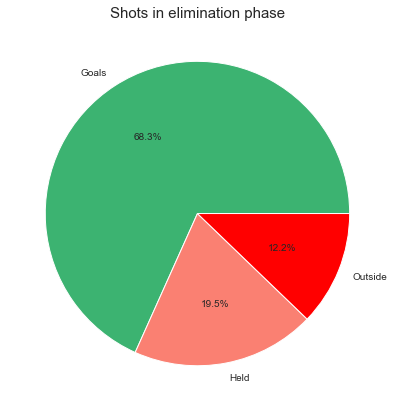

In [ ]:
# Pie plot
pie_elim = plt.figure(figsize =(10, 7))
mycolors = ["mediumseagreen", "Salmon", "Red"]
plt.pie(shots_elim, labels = labels, autopct='%1.1f%%', colors = mycolors)

plt.title("Shots in elimination phase", fontsize = 15)
plt.show()

In [ ]:
# All shots at elimination phase
totalgoals_normal = df[df.Elimination == 0].shape[0]

# Goals hit at "normal" phase
goals_normal = df.query("Goal == 1 & Elimination == 0").shape[0]

# Shots outside the goal 
outside_normal = df.query("Goal == 0 & Elimination == 0 & OnTarget == 0").shape[0]

# misses
held_normal = totalgoals_normal - goals_normal - outside_normal

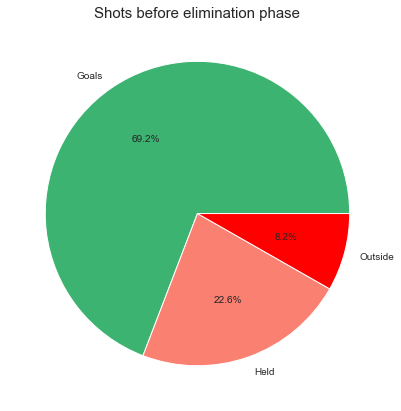

In [ ]:
# Pie plot
goals_normal = [goals_normal, held_normal, outside_normal]
labels = ["Goals", "Held", "Outside"]

pie_elim = plt.figure(figsize =(10, 7))
mycolors = ["mediumseagreen", "Salmon", "Red"]
plt.pie(goals_normal, labels = labels, autopct='%1.1f%%', colors = mycolors)

plt.title("Shots before elimination phase", fontsize = 15)
plt.show()

## Goal Zone

A comparison of the zones in which successful shots are made, as well as in the decisive shot.

In [ ]:
# create Dataframe with only necessary columns
zone_df = df[["Goal_Zone","Goal_Level", "Goal_Side", "Goal", "Elimination"]]

# Selecting only rows with successful goals
goal_df = zone_df[zone_df.Goal == 1]                        
goal_df.head()

,Goal_Zone,Goal_Level,Goal_Side,Goal,Elimination
0,7,down,L,1,0
1,9,down,R,1,0
2,6,middle,R,1,0
3,2,top,C,1,0
4,9,down,R,1,0


In [ ]:
# Zones of Goals
goal_level = goal_df['Goal_Level'].unique()
goal_level = ["top", "middle", "down"]
print(goal_level)

goal_side = goal_df['Goal_Side'].unique()
goal_side = ["L", "C", "R"]
print(goal_side)

['top', 'middle', 'down']
['L', 'C', 'R']


In [ ]:
# count occurence of zone numbers
zones_list = goal_df['Goal_Zone'].values.tolist()

count = []
num = 0
for num in range(1,10):
    x = zones_list.count(num)
    count.append(x)
    print(num, count)

# show list
print(count)

1 [22]
2 [22, 13]
3 [22, 13, 14]
4 [22, 13, 14, 31]
5 [22, 13, 14, 31, 14]
6 [22, 13, 14, 31, 14, 28]
7 [22, 13, 14, 31, 14, 28, 48]
8 [22, 13, 14, 31, 14, 28, 48, 16]
9 [22, 13, 14, 31, 14, 28, 48, 16, 35]
[22, 13, 14, 31, 14, 28, 48, 16, 35]


In [ ]:
# add new column with counted goals in percent each zone
def f(goal_df):
    if goal_df['Goal_Zone'] == 1:
        val = 9.95
    elif goal_df['Goal_Zone'] == 2:
        val = 5.88
    elif goal_df['Goal_Zone'] == 3:
        val = 6.33
    elif goal_df['Goal_Zone'] == 4:
        val = 14.04
    elif goal_df['Goal_Zone'] == 5:
        val = 6.33
    elif goal_df['Goal_Zone'] == 6:
        val = 12.67
    elif goal_df['Goal_Zone'] == 7:
        val = 21.72
    elif goal_df['Goal_Zone'] == 8:
        val = 7.24
    else:
        val = 15.84
    return val

goal_df["Goal_count"] = goal_df.apply(f, axis=1)
goal_df.head()

C:\Users\rungw\AppData\Local\Temp/ipykernel_28132/2998956032.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goal_df["Goal_count"] = goal_df.apply(f, axis=1)


,Goal_Zone,Goal_Level,Goal_Side,Goal,Elimination,Goal_count
0,7,down,L,1,0,21.72
1,9,down,R,1,0,15.84
2,6,middle,R,1,0,12.67
3,2,top,C,1,0,5.88
4,9,down,R,1,0,15.84


In [ ]:
# create Pivot table
goal_df2 = pd.pivot_table(goal_df,index=['Goal_Level'], columns = 'Goal_Side', values = "Goal_count")

# change index and column order in pivot table
col_order = ["L", "C", "R"]
index_order = ["top", "middle", "down"]
goal_df2 = goal_df2.reindex(col_order, axis=1)
goal_df2 = goal_df2.reindex(index_order, axis=0)
goal_df2

Goal_Side,L,C,R
Goal_Level,,,
top,9.95,5.88,6.33
middle,14.04,6.33,12.67
down,21.72,7.24,15.84


Text(88.0, 0.5, 'Level')

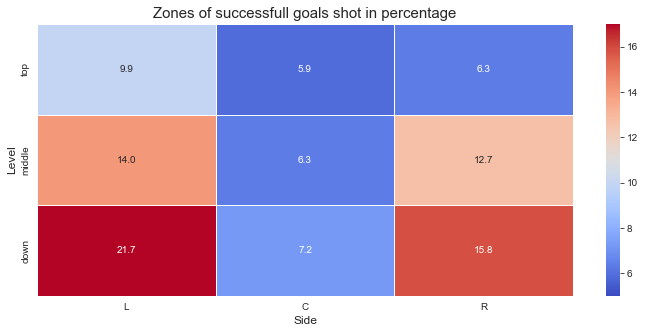

In [ ]:
# Create Heatmap with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(goal_df2, 
            cmap="coolwarm", 
            annot=True, 
            fmt=".1f", 
            linewidth=.5, 
            vmin=5, 
            vmax=17)

plt.title('Zones of successfull goals shot in percentage', fontsize = 15)
plt.xlabel('Side', fontsize = 12) 
plt.ylabel('Level', fontsize = 12) 

In [ ]:
# create dataframe with only decicive shots
# same procedure as above
elim_goal_df = zone_df[zone_df.Elimination == 1]                        
elim_goal_df.head()

,Goal_Zone,Goal_Level,Goal_Side,Goal,Elimination
9,9,down,R,1,1
11,9,down,R,1,1
21,7,down,L,1,1
28,4,middle,L,1,1
37,1,top,L,1,1


In [ ]:
# count occurence of zone numbers
elim_zones_list = elim_goal_df['Goal_Zone'].values.tolist()

elim_count = []
num = 0
for num in range(1,10):
    x = elim_zones_list.count(num)
    elim_count.append(x)
    print(num, elim_count)

# show list
print(elim_count)

1 [4]
2 [4, 1]
3 [4, 1, 4]
4 [4, 1, 4, 3]
5 [4, 1, 4, 3, 3]
6 [4, 1, 4, 3, 3, 4]
7 [4, 1, 4, 3, 3, 4, 12]
8 [4, 1, 4, 3, 3, 4, 12, 4]
9 [4, 1, 4, 3, 3, 4, 12, 4, 6]
[4, 1, 4, 3, 3, 4, 12, 4, 6]


In [ ]:
# add new column with counted goals in percent each zone
def f(elim_goal_df):
    if elim_goal_df['Goal_Zone'] == 1:
        val = 9.76
    elif elim_goal_df['Goal_Zone'] == 2:
        val = 4.88
    elif elim_goal_df['Goal_Zone'] == 3:
        val = 9.76
    elif elim_goal_df['Goal_Zone'] == 4:
        val = 7.32
    elif elim_goal_df['Goal_Zone'] == 5:
        val = 7.32
    elif elim_goal_df['Goal_Zone'] == 6:
        val = 9.76
    elif elim_goal_df['Goal_Zone'] == 7:
        val = 29.27
    elif elim_goal_df['Goal_Zone'] == 8:
        val = 9.76
    else:
        val = 14.63
    return val

elim_goal_df["Elim_Goal_count"] = elim_goal_df.apply(f, axis=1)
elim_goal_df.head()

C:\Users\rungw\AppData\Local\Temp/ipykernel_28132/3642467169.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elim_goal_df["Elim_Goal_count"] = elim_goal_df.apply(f, axis=1)


,Goal_Zone,Goal_Level,Goal_Side,Goal,Elimination,Elim_Goal_count
9,9,down,R,1,1,14.63
11,9,down,R,1,1,14.63
21,7,down,L,1,1,29.27
28,4,middle,L,1,1,7.32
37,1,top,L,1,1,9.76


In [ ]:
# create Pivot table
elim_goal_df2 = pd.pivot_table(elim_goal_df,index=['Goal_Level'], columns = 'Goal_Side', values = "Elim_Goal_count")

# change index and column order in pivot table
col_order = ["L", "C", "R"]
index_order = ["top", "middle", "down"]
elim_goal_df2 = elim_goal_df2.reindex(col_order, axis=1)
elim_goal_df2 = elim_goal_df2.reindex(index_order, axis=0)
elim_goal_df2

Goal_Side,L,C,R
Goal_Level,,,
top,9.76,4.88,9.76
middle,7.32,7.32,9.76
down,29.27,9.76,14.63


Text(88.0, 0.5, 'Level')

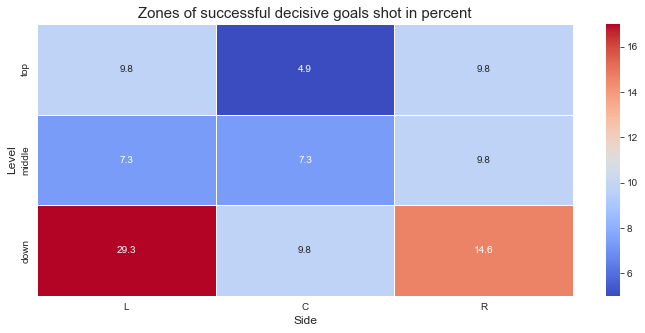

In [ ]:
# Create Heatmap with seaborn
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(elim_goal_df2, 
            cmap="coolwarm", 
            annot=True, 
            fmt=".1f", 
            linewidth=.5, 
            vmin=5, 
            vmax=17)

plt.title('Zones of successful decisive goals shot in percent', fontsize = 15)
plt.xlabel('Side', fontsize = 12) 
plt.ylabel('Level', fontsize = 12) 

## Goalkeeper

On which side of the goal does the goalkeeper catch the most shots? Do they change their behavior when it is the decisive goal?

In [ ]:
# create Dataframe with only necessary variables
gk_df = df[["Keeper","Goal", "OnTarget", "Elimination"]]

# Selecting rows with only goals that not shot outside
gk_df = gk_df[(gk_df.OnTarget == 1)]           
gk_df 

,Keeper,Goal,OnTarget,Elimination
0,R,1,1,0
1,C,1,1,0
2,L,1,1,0
3,C,1,1,0
4,L,1,1,0
...,...,...,...,...
314,L,0,1,0
315,R,1,1,0
317,L,1,1,0
318,L,1,1,0


In [ ]:
# Count number of Goalkeeper side catched and not catched
gk_left = gk_df.query("Keeper == 'L' & Goal == 0").shape[0]
gk_left_g = gk_df.query("Keeper == 'L' & Goal == 1").shape[0]

gk_center = gk_df.query("Keeper == 'C' & Goal == 0").shape[0]
gk_center_g = gk_df.query("Keeper == 'C' & Goal == 1").shape[0]

gk_right = gk_df.query("Keeper == 'R' & Goal == 0").shape[0]
gk_right_g = gk_df.query("Keeper == 'R' & Goal == 1").shape[0]

gk_catched = [gk_left, gk_center, gk_right]
gk_goal = [gk_left_g, gk_center_g, gk_right_g]

print(gk_catched, gk_goal)

[37, 5, 28] [104, 28, 88]


In [ ]:
# get relative number of catched goals to not catched goals on each side
gk_pct = []
for i, j in zip(gk_catched, gk_goal):
    gk_pct.append((i/(i + j)) * 100)

gk_pct = [round(num, 2) for num in gk_pct]
gk_pct

[26.24, 15.15, 24.14]

<function matplotlib.pyplot.show(close=None, block=None)>

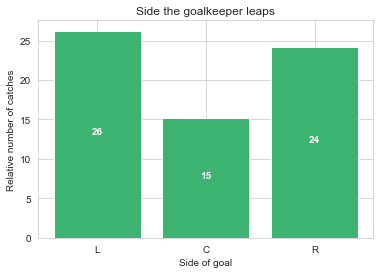

In [ ]:
fig, ax = plt.subplots()

# create bar chart
ax.bar(goal_side, gk_pct, color ='mediumseagreen')
plt.xlabel("Side of goal")
plt.ylabel("Relative number of catches")
plt.title("Side the goalkeeper leaps")

# display value inside bar
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)

plt.show

#### Which side does goalkeeper decide during elimination phase?

In [ ]:
# get number of occurence of each side
elim_gk_left = gk_df.query("Keeper == 'L' & Elimination == 1").shape[0]

elim_gk_center = gk_df.query("Keeper == 'C' & Elimination == 1").shape[0]

elim_gk_right = gk_df.query("Keeper == 'R' & Elimination == 1").shape[0]

elim_gk = [elim_gk_left, elim_gk_center, elim_gk_right]
elim_gk

[14, 4, 17]

In [ ]:
# relative numbers of all sides during elimination stage
elim_pct = []
for i in elim_gk:
    elim_pct.append((i/35) * 100)

elim_pct = [round(num, 2) for num in elim_pct]
elim_pct

[40.0, 11.43, 48.57]

In [ ]:
normal_gk = [gk_catched[i] + gk_goal[i] for i in range(len(gk_catched))] 
normal_gk

[141, 33, 116]

In [ ]:
# relative numbers of all sides during elimination stage
elim_pct = []
for i in normal_gk:
    elim_pct.append((i/290) * 100)

normal_pct = [round(num, 2) for num in elim_pct]
normal_pct

[48.62, 11.38, 40.0]

<function matplotlib.pyplot.show(close=None, block=None)>

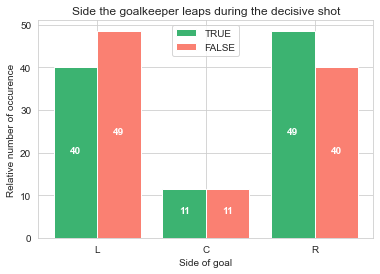

In [ ]:
import numpy as np
# create x value
x = np.arange(len(goal_side))
width = 0.4

normal_pct = [48.62, 11.38, 40.0]
elim_pct = [40.0, 11.43, 48.57]

# create plot
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, elim_pct, color ='mediumseagreen', width = width, label = "TRUE")
bar2 = ax.bar(x + width/2, normal_pct, color ='salmon', width = width, label = "FALSE")

# set labels and display value in bars
plt.xlabel("Side of goal")
plt.ylabel("Relative number of occurence")
plt.title("Side the goalkeeper leaps during the decisive shot")

# display value inside bar
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)

ax.set_xticks(x)
ax.set_xticklabels(goal_side)
ax.legend()

plt.show